# Attributes Info 
* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

* **target:** heart disease (1 = no, 2 = yes)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import pickle

In [22]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [23]:
df.shape

(270, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

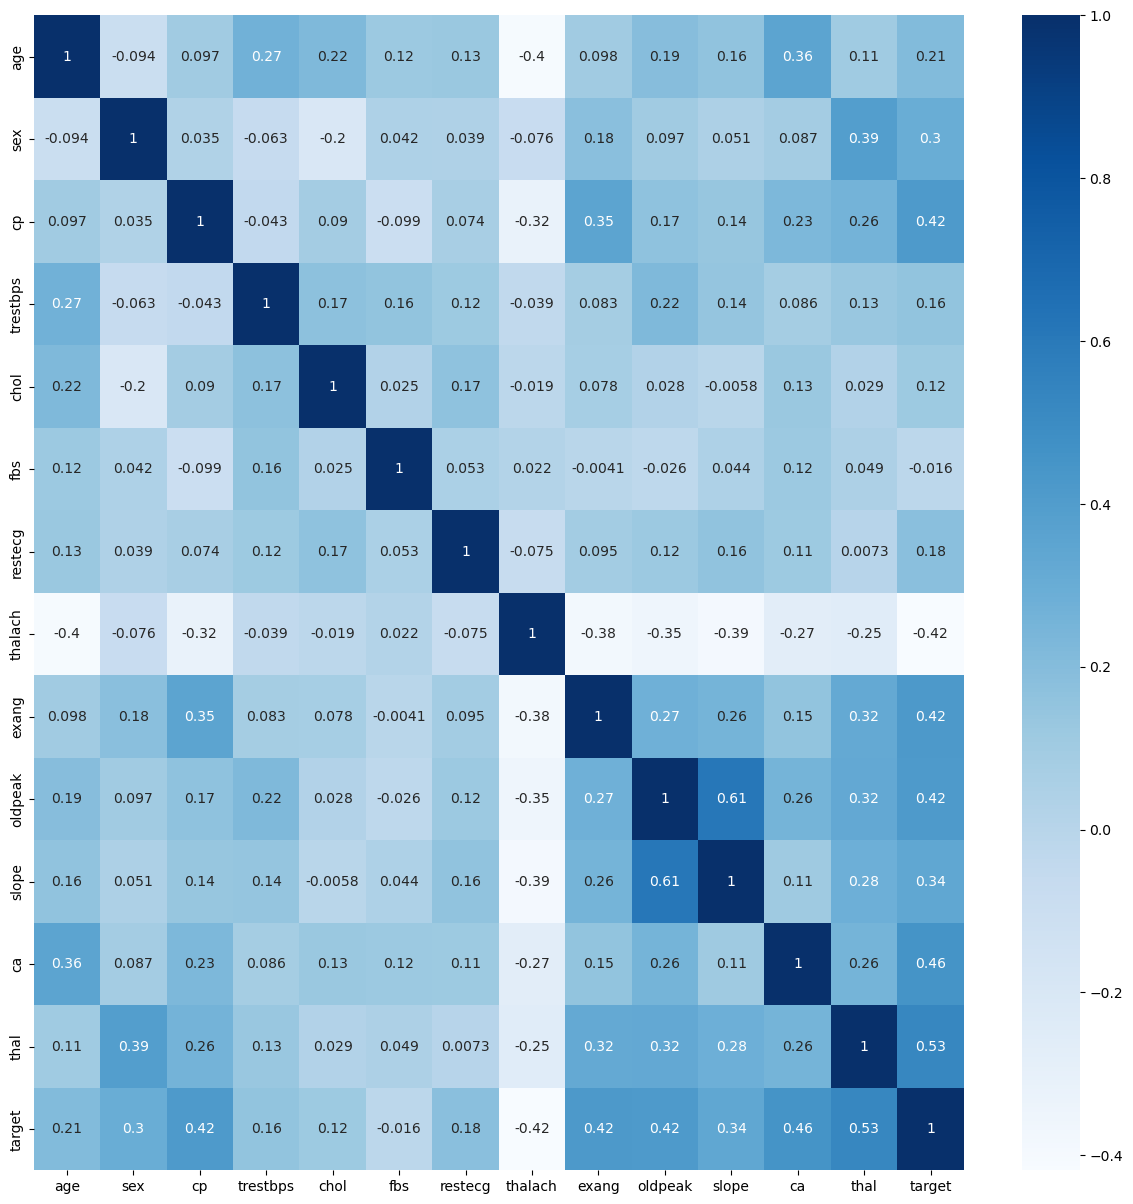

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

In [29]:
target = df['target']
features = df.drop(['target'], axis = 1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)
y_pred_svc = svc_classifier.predict(x_test)
accuracy_score(y_test , y_pred_svc)

0.7794117647058824

In [33]:
score_df = []
for k in range(1,100):
    dt_classifier = DecisionTreeClassifier(random_state = k)
    dt_classifier.fit(x_train, y_train)
    y_pred_dt = dt_classifier.predict(x_test)
    score_df.append(accuracy_score(y_test, y_pred_dt))

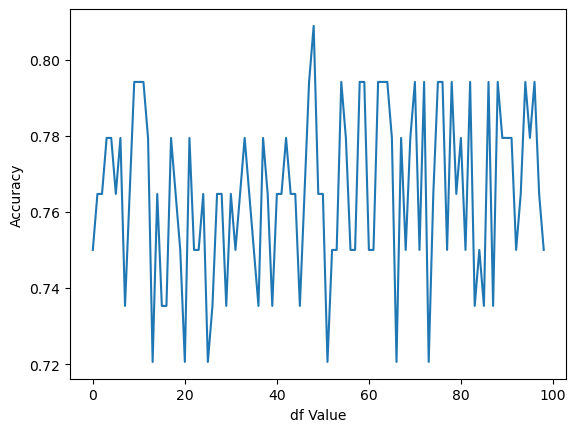

In [34]:
plt.plot(score_df)
plt.xlabel("df Value")
plt.ylabel("Accuracy")
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 49)
dt_classifier.fit(x_train, y_train)
y_pred_dt = dt_classifier.predict(x_test)
accuracy_score(y_test, y_pred_dt)

0.8088235294117647

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.7941176470588235

In [37]:
score = []
for k in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train , y_train)
    y_pred_knn = knn_classifier.predict(x_test)
    score.append(accuracy_score(y_test,y_pred_knn))

c:\Users\nb.naidu\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\nb.naidu\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

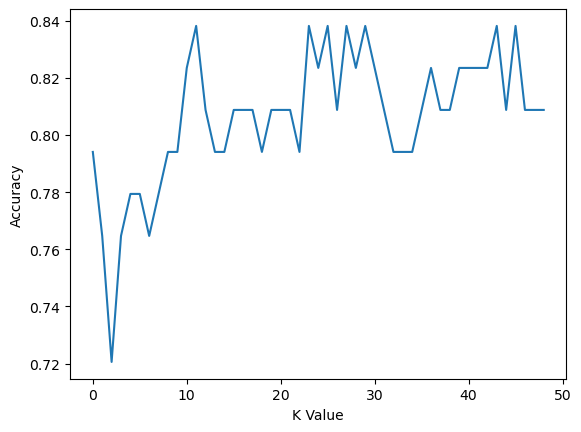

In [38]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
knn_classifier.fit(x_train , y_train)
y_pred_knn = knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

c:\Users\nb.naidu\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8382352941176471

In [40]:
pickle.dump(rf_classifier , open('model.pkl' , 'wb'))